# Matplotlib & Seaborn - Heatmaps

---

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as plt_patches
import matplotlib.patheffects as plt_eff
import seaborn as sns

---

## Datasets

In [2]:
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

---

# Basic Heatmaps

In [3]:
correlation_matrix = tips.corr()
correlation_matrix

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


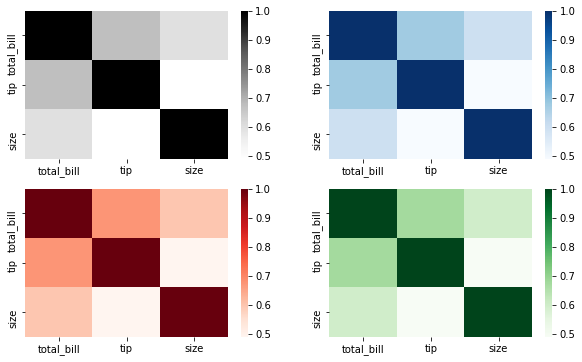

In [4]:
fig, axes = plt.subplots(2, 2, figsize = (10, 6))

# Da notare come con correlazioni solo positive l'ideale sia
# una "cmap" sequenziale a singolo colore

sns.heatmap(data = correlation_matrix, ax = axes[0, 0], cmap = "Greys")
sns.heatmap(data = correlation_matrix, ax = axes[0, 1], cmap = "Blues")
sns.heatmap(data = correlation_matrix, ax = axes[1, 0], cmap = "Reds")
sns.heatmap(data = correlation_matrix, ax = axes[1, 1], cmap = "Greens")

plt.show()

---

# Triangular Heatmap

In [5]:
correlation_matrix = iris.corr()
correlation_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


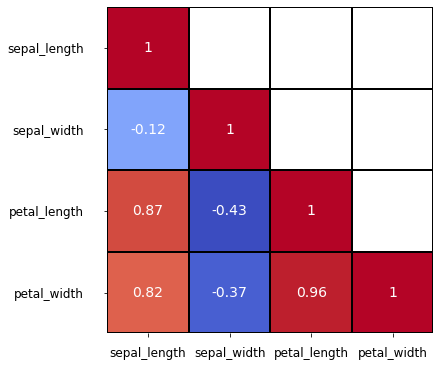

In [6]:
fig, ax = plt.subplots(figsize = (8, 6))

mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = 1
for i in range(mask.shape[0]):
    mask[i, i] = 0

# Da notare come con correlazioni negative l'ideale sia
# una "cmap" a due colori divergenti
sns.heatmap(correlation_matrix,
            mask = mask,
            square=True, cmap = "coolwarm",
            linecolor = "k", linewidths = 1,
            annot = True, annot_kws = {"size": 14},
            cbar = False)

plt.yticks(rotation = 0)
ax.tick_params(axis = "both", labelsize = 12)
ax.tick_params(axis = "y", pad=20)
ax.tick_params(axis = "x", pad = 10)
plt.show()

---